In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import pandas as pd
import matplotlib.ticker as ticker

home_dir = "/home/katelyn/Documents/COSC490/Stemming"
data_dir = path.join(home_dir, "Data/wikt")
labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins","wiktionary"]

### Cluster Size Distribution

In [2]:
wikt_distribution = np.loadtxt(path.join(data_dir, "wikt_distribution.csv"))
paiceHusk_distribution = np.loadtxt(path.join(data_dir, "paiceHusk_distribution.csv"))
krovetz_distribution = np.loadtxt(path.join(data_dir, "krovetz_distribution.csv"))
sStripping_distribution = np.loadtxt(path.join(data_dir, "sStripping_distribution.csv"))
porter2_distribution = np.loadtxt(path.join(data_dir, "porter2_distribution.csv"))
lovins_distribution = np.loadtxt(path.join(data_dir, "lovins_distribution.csv"))

In [3]:
data = {
    "wiktionary": wikt_distribution
}
wikt = pd.DataFrame(data=data)
wikt = wikt.reset_index().melt(id_vars=["index"])
wikt = wikt.rename(columns={"variable":"stemmer"})

data = {
    "paiceHusk" : paiceHusk_distribution
}
paiceHusk = pd.DataFrame(data=data)
paiceHusk = paiceHusk.reset_index().melt(id_vars=["index"])
paiceHusk = paiceHusk.rename(columns={"variable":"stemmer"})

data = {
    "krovetz" : krovetz_distribution
}
krovetz = pd.DataFrame(data=data)
krovetz = krovetz.reset_index().melt(id_vars=["index"])
krovetz = krovetz.rename(columns={"variable":"stemmer"})

data={
    "sStripping" : sStripping_distribution
}
sStripping = pd.DataFrame(data=data)
sStripping = sStripping.reset_index().melt(id_vars=["index"])
sStripping = sStripping.rename(columns={"variable":"stemmer"})

data={
    "porter2" : porter2_distribution
}
porter2 = pd.DataFrame(data=data)
porter2 = porter2.reset_index().melt(id_vars=["index"])
porter2 = porter2.rename(columns={"variable":"stemmer"})

data={
    "lovins" : lovins_distribution
}
lovins = pd.DataFrame(data=data)
lovins = lovins.reset_index().melt(id_vars=["index"])
lovins = lovins.rename(columns={"variable":"stemmer"})


cluster_sizes = pd.concat([wikt,paiceHusk,krovetz,sStripping,porter2,lovins])
display(cluster_sizes)

,index,stemmer,value
0,0,wiktionary,1.0
1,1,wiktionary,1.0
2,2,wiktionary,1.0
3,3,wiktionary,1.0
4,4,wiktionary,1.0
...,...,...,...
207843,207843,lovins,1.0
207844,207844,lovins,1.0
207845,207845,lovins,1.0
207846,207846,lovins,1.0


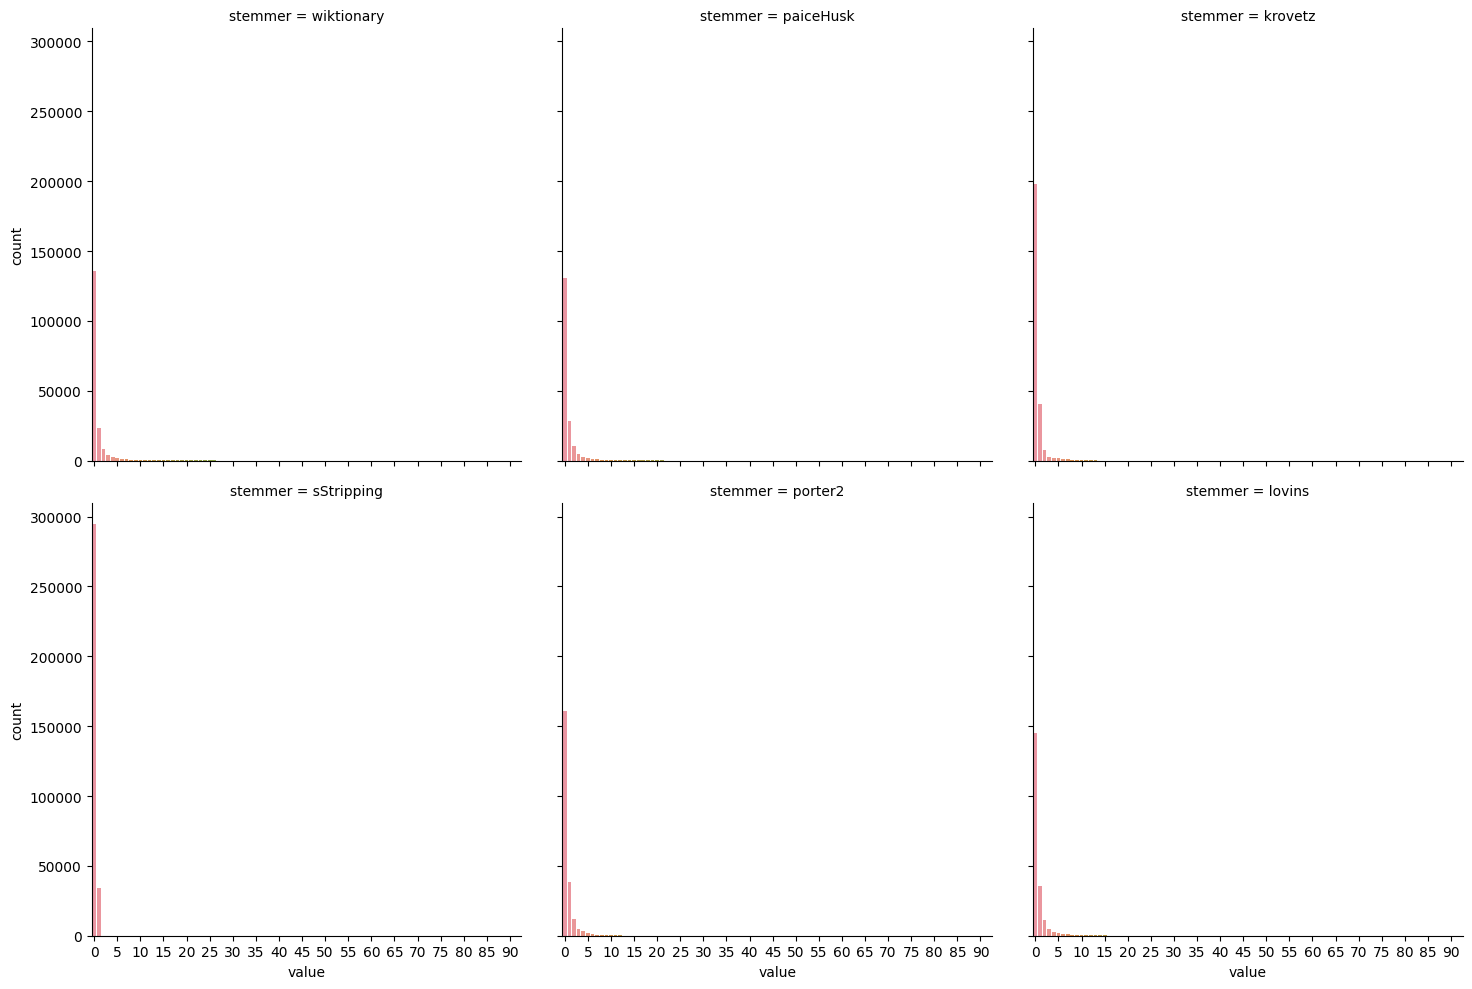

In [4]:
axes = sns.catplot(data=cluster_sizes, kind="count", x="value", col="stemmer", col_wrap=3)
for ax in axes.axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

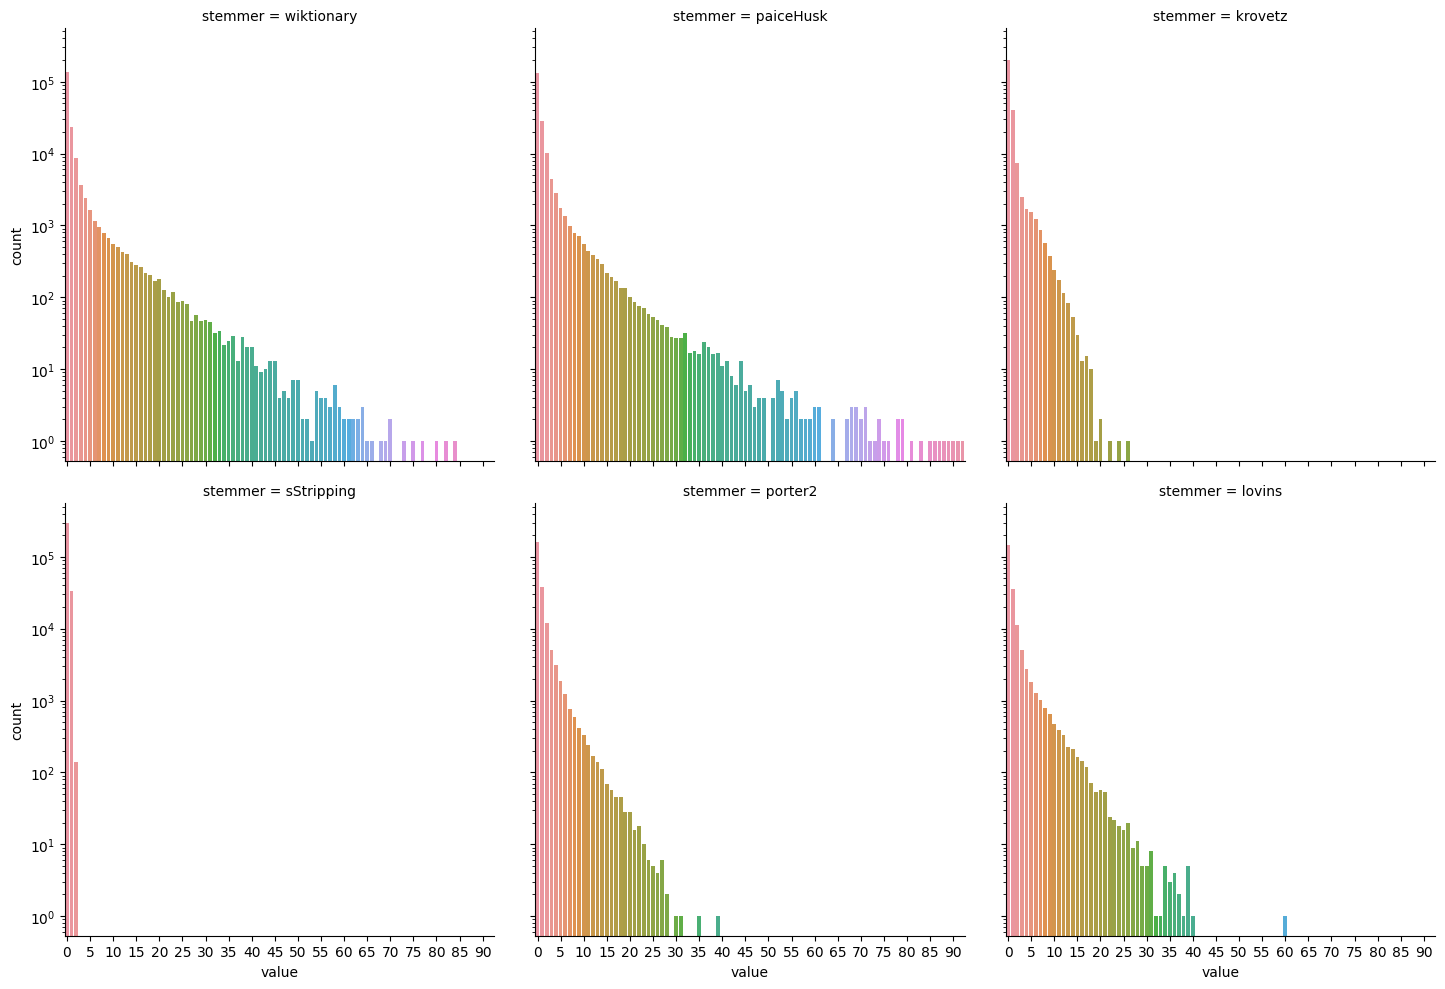

In [5]:
axes = sns.catplot(data=cluster_sizes, kind="count", x="value", col="stemmer", col_wrap=3)
for ax in axes.axes:
    ax.set_yscale("log")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

### Number of Clusters

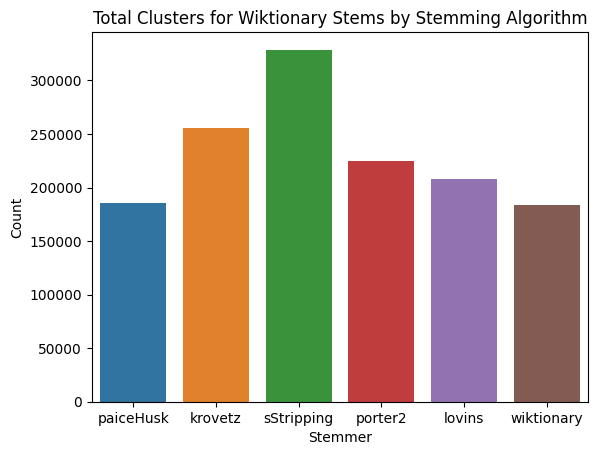

In [5]:
data = [len(paiceHusk_distribution),len(krovetz_distribution),len(sStripping_distribution),len(porter2_distribution),len(lovins_distribution),len(wikt_distribution)]
sns.barplot(x=labels, y=data)
plt.title("Total Clusters for Wiktionary Stems by Stemming Algorithm")
plt.xlabel("Stemmer")
plt.ylabel("Count")
plt.show()

### Word Distances

In [4]:
paiceHusk_word_distances = np.loadtxt(path.join(data_dir, "paiceHusk_word_distances.csv"))
krovetz_word_distances = np.loadtxt(path.join(data_dir, "krovetz_word_distances.csv"))
sStripping_word_distances = np.loadtxt(path.join(data_dir, "sStripping_word_distances.csv"))
porter2_word_distances = np.loadtxt(path.join(data_dir, "porter2_word_distances.csv"))
lovins_word_distances = np.loadtxt(path.join(data_dir, "lovins_word_distances.csv"))

In [5]:
data = {
    "paiceHusk" : paiceHusk_word_distances
}
paiceHusk = pd.DataFrame(data=data)
paiceHusk = paiceHusk.reset_index().melt(id_vars=["index"])
paiceHusk = paiceHusk.rename(columns={"variable":"stemmer"})

data = {
    "krovetz" : krovetz_word_distances
}
krovetz = pd.DataFrame(data=data)
krovetz = krovetz.reset_index().melt(id_vars=["index"])
krovetz = krovetz.rename(columns={"variable":"stemmer"})

data={
    "sStripping" : sStripping_word_distances
}
sStripping = pd.DataFrame(data=data)
sStripping = sStripping.reset_index().melt(id_vars=["index"])
sStripping = sStripping.rename(columns={"variable":"stemmer"})

data={
    "porter2" : porter2_word_distances
}
porter2 = pd.DataFrame(data=data)
porter2 = porter2.reset_index().melt(id_vars=["index"])
porter2 = porter2.rename(columns={"variable":"stemmer"})

data={
    "lovins" : lovins_word_distances
}
lovins = pd.DataFrame(data=data)
lovins = lovins.reset_index().melt(id_vars=["index"])
lovins = lovins.rename(columns={"variable":"stemmer"})


word_distances = pd.concat([paiceHusk,krovetz,sStripping,porter2,lovins])
display(word_distances)

,index,stemmer,value
0,0,paiceHusk,0.0
1,1,paiceHusk,0.0
2,2,paiceHusk,0.0
3,3,paiceHusk,1.0
4,4,paiceHusk,0.0
...,...,...,...
362889,362889,lovins,0.0
362890,362890,lovins,0.0
362891,362891,lovins,1.0
362892,362892,lovins,0.0


In [6]:
for stemmer in labels[:-1]:
    target_data = word_distances[word_distances["stemmer"] == stemmer]
    print(f"{stemmer} {target_data['value'].mean()}")

paiceHusk 1.6832215467877671
krovetz 1.1657922148065276
sStripping 1.9660810043704222
porter2 1.4187641570265697
lovins 1.4290040617921487


In [28]:
summary = list()
for stemmer in labels[:-1]:
    target_data = word_distances[word_distances["stemmer"] == stemmer]
    entry = {}
    entry["stemmer"] = stemmer
    entry["mean"] = str(target_data['value'].mean())[:4]
    summary.append(entry)
summary = pd.DataFrame(summary)
display(summary)

,stemmer,mean
0,paiceHusk,1.68
1,krovetz,1.16
2,sStripping,1.96
3,porter2,1.41
4,lovins,1.42


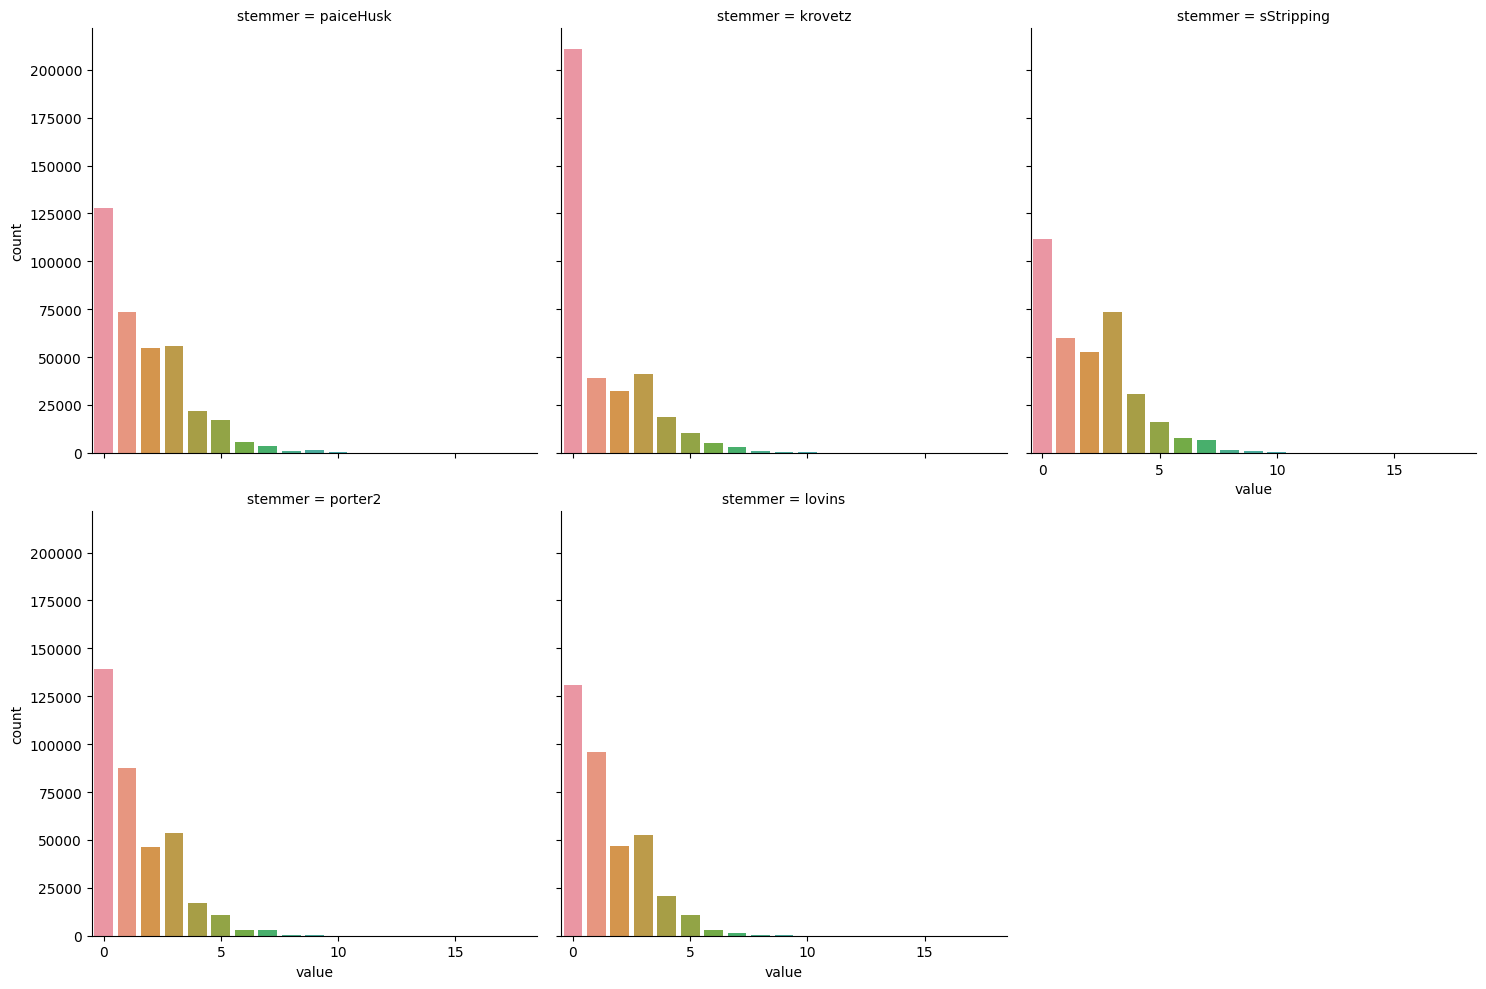

In [9]:
axes = sns.catplot(data=word_distances, kind="count", x="value", col="stemmer", col_wrap=3)
for ax in axes.axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

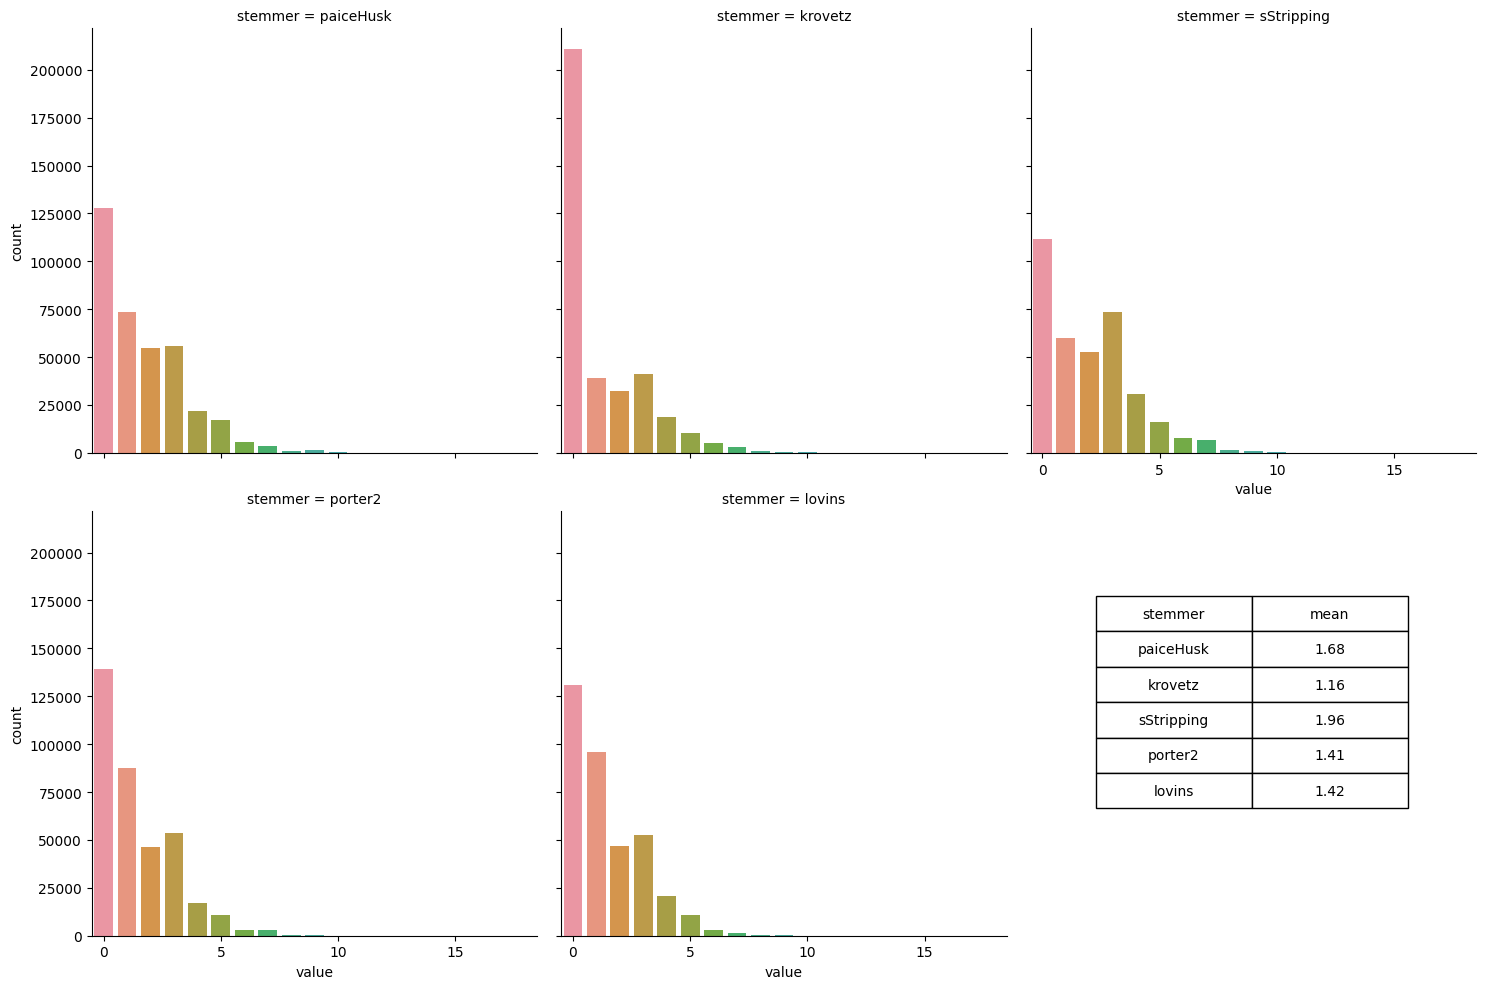

In [41]:
axes = sns.catplot(data=word_distances, kind="count", x="value", col="stemmer", col_wrap=3)
for ax in axes.axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.table(cellText=summary.values, colLabels=summary.columns, cellLoc= 'center', rowLoc='center', loc='right', bbox=[1.2,.3,0.7,0.5])
plt.show()

### Average Cluster F-Measure

In [8]:
paiceHusk_cluster_fmeasures = np.loadtxt(path.join(data_dir, "paiceHusk_cluster_fmeasures.csv"))
krovetz_cluster_fmeasures = np.loadtxt(path.join(data_dir, "krovetz_cluster_fmeasures.csv"))
sStripping_cluster_fmeasures = np.loadtxt(path.join(data_dir, "sStripping_cluster_fmeasures.csv"))
porter2_cluster_fmeasures = np.loadtxt(path.join(data_dir, "porter2_cluster_fmeasures.csv"))
lovins_cluster_fmeasures = np.loadtxt(path.join(data_dir, "lovins_cluster_fmeasures.csv"))

fmeasures = [paiceHusk_cluster_fmeasures, krovetz_cluster_fmeasures, sStripping_cluster_fmeasures, porter2_cluster_fmeasures, lovins_cluster_fmeasures]

In [9]:
averages = list()
for stemmer in fmeasures:
    averages.append(stemmer.mean())

data = {
    "Stemmer" : labels[:-1],
    "F-Measure" : averages
}

average_fmeasures = pd.DataFrame(data=data)
display(average_fmeasures)

,Stemmer,F-Measure
0,paiceHusk,0.811475
1,krovetz,0.747436
2,sStripping,0.619239
3,porter2,0.772651
4,lovins,0.778938


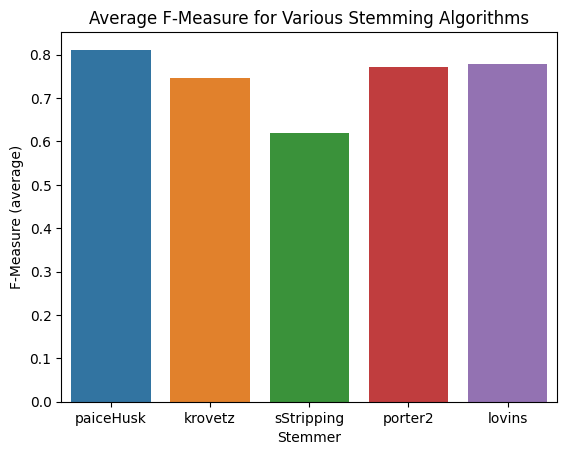

In [10]:
sns.barplot(x="Stemmer", y="F-Measure", data=average_fmeasures)
plt.title("Average F-Measure for Various Stemming Algorithms")
plt.ylabel("F-Measure (average)")
plt.show()

### Cluster F-Measures

In [16]:
data = {
    "paiceHusk" : paiceHusk_cluster_fmeasures
}
paiceHusk = pd.DataFrame(data=data)
paiceHusk = paiceHusk.reset_index().melt(id_vars=["index"])
paiceHusk = paiceHusk.rename(columns={"variable":"stemmer"})

data = {
    "krovetz" : krovetz_cluster_fmeasures
}
krovetz = pd.DataFrame(data=data)
krovetz = krovetz.reset_index().melt(id_vars=["index"])
krovetz = krovetz.rename(columns={"variable":"stemmer"})

data={
    "sStripping" : sStripping_cluster_fmeasures
}
sStripping = pd.DataFrame(data=data)
sStripping = sStripping.reset_index().melt(id_vars=["index"])
sStripping = sStripping.rename(columns={"variable":"stemmer"})

data={
    "porter2" : porter2_cluster_fmeasures
}
porter2 = pd.DataFrame(data=data)
porter2 = porter2.reset_index().melt(id_vars=["index"])
porter2 = porter2.rename(columns={"variable":"stemmer"})

data={
    "lovins" : lovins_cluster_fmeasures
}
lovins = pd.DataFrame(data=data)
lovins = lovins.reset_index().melt(id_vars=["index"])
lovins = lovins.rename(columns={"variable":"stemmer"})

In [17]:
fmeasures = pd.concat([paiceHusk,krovetz,sStripping,porter2,lovins])
display(fmeasures)

,index,stemmer,value
0,0,paiceHusk,1.0
1,1,paiceHusk,1.0
2,2,paiceHusk,1.0
3,3,paiceHusk,1.0
4,4,paiceHusk,1.0
...,...,...,...
207843,207843,lovins,1.0
207844,207844,lovins,1.0
207845,207845,lovins,1.0
207846,207846,lovins,1.0


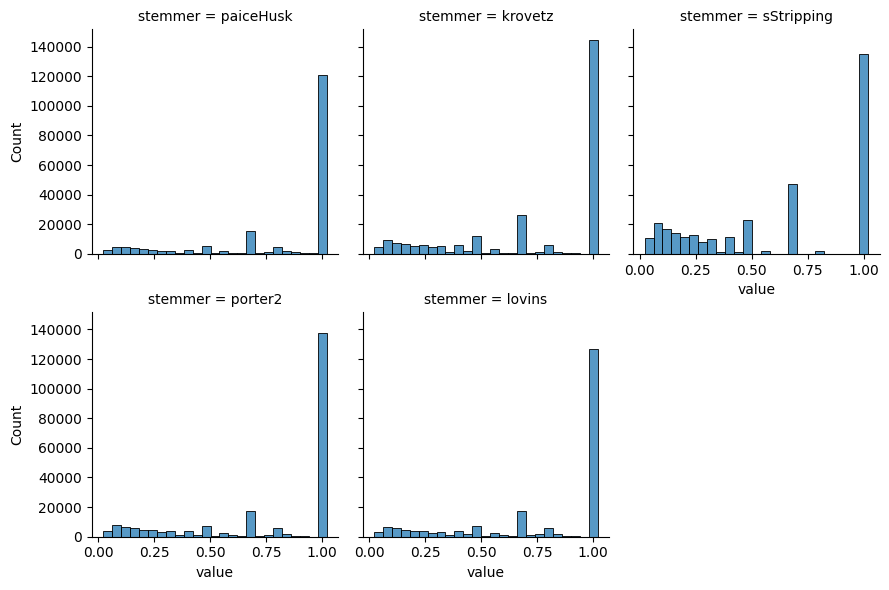

In [18]:
g = sns.FacetGrid(fmeasures, col="stemmer", col_wrap=3)
g.map_dataframe(sns.histplot, x="value", binwidth=0.04)